# Load Necessary Libraries 

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [38]:
data=pd.read_csv("diabetes.csv")


In [39]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# data visualization

Text(0.5, 1.0, 'Womans have diabetes')

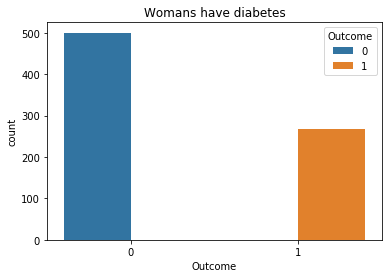

In [15]:
sns.countplot(data=data ,x="Outcome",hue="Outcome")
plt.title("Womans have diabetes")

Text(0.5, 1.0, ' Age ')

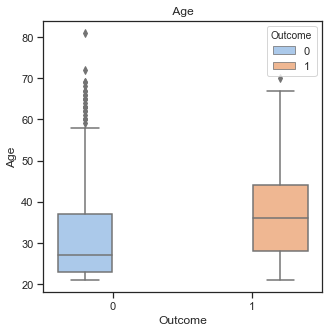

In [95]:
fig, ax=plt.subplots(figsize=(5,5))
sns.boxplot(y="Age",x='Outcome',hue='Outcome',data=data)
plt.title(" Age ")

In [91]:
low=data.Age[(data.Age>=20)&(data.Age<30)].ipynb_checkpoints/
medium=data.Age[(data.Age>=30)&(data.Age<50)]
high=data.Age[(data.Age>=50)&(data.Age<=80)]


3      21
6      26
7      29
20     27
23     29
       ..
753    26
758    26
760    22
764    27
767    23
Name: Age, Length: 396, dtype: int64

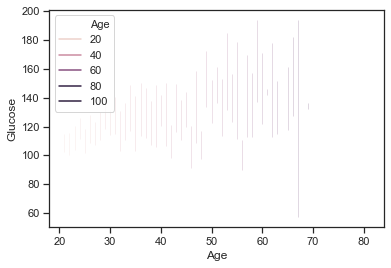

In [96]:
sns.lineplot(data=data ,x='Age',hue='Age',y="Glucose")

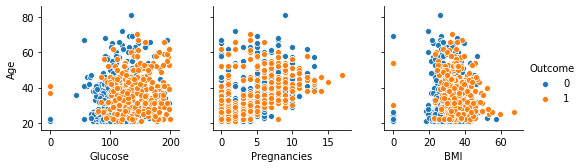

In [72]:
sns.pairplot(x_vars=["Glucose","Pregnancies","BMI"],y_vars="Age",hue="Outcome",data=data)

In [15]:
corr_matrix=data.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


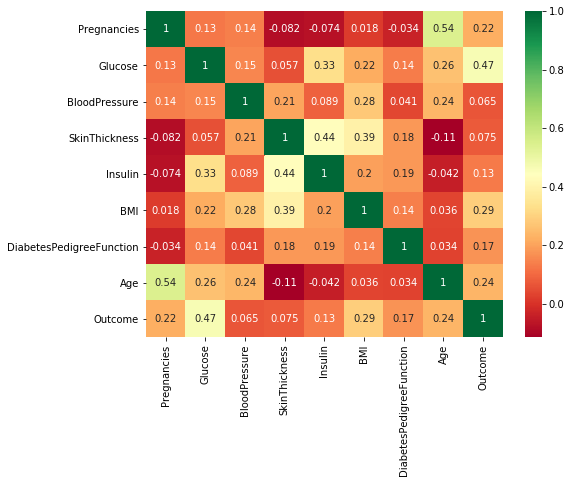

In [10]:
import seaborn as sns
#get correlations of each features in dataset
corr_matrix = data.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(8,6))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Build model use Random Forest Classifier

In [62]:
x=data[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
y=data.Outcome
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

# Voting Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
tree_clf = DecisionTreeClassifier( max_depth=4, criterion='gini')
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('tree', tree_clf)],
voting='hard')
voting_clf.fit(x_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf,tree_clf, voting_clf):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ense

LogisticRegression 0.7835497835497836
RandomForestClassifier 0.7748917748917749
SVC 0.6796536796536796
DecisionTreeClassifier 0.7532467532467533


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier 0.7575757575757576


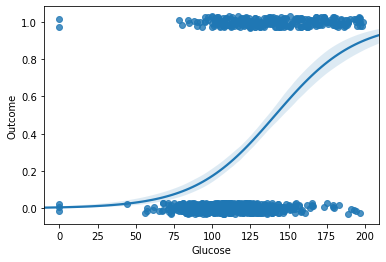

In [37]:
ax = sns.regplot(x="Glucose", y="Outcome", data=data,
                 logistic=True, n_boot=500, y_jitter=.03)

In [56]:
from sklearn.linear_model import LogisticRegression
lr_clf= LogisticRegression()
lr_clf.fit(x_train,y_train)
pred=lr_clf.predict(x_test)
print("Accuracy for Logistic Regression on  data: ",accuracy_score(y_test,pred))
# 0.7835497835497836

Accuracy for Logistic Regression on  data:  0.7835497835497836


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Model Evaluation Metrics

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
print ("confusion_matrix:",confusion_matrix(y_test,pred))
print("precision:",precision_score(y_test,pred))
print("recall:",recall_score(y_test,pred))
print("f1_score :",f1_score(y_test,pred))

confusion_matrix: [[142  15]
 [ 35  39]]
precision: 0.7222222222222222
recall: 0.527027027027027
f1_score : 0.609375


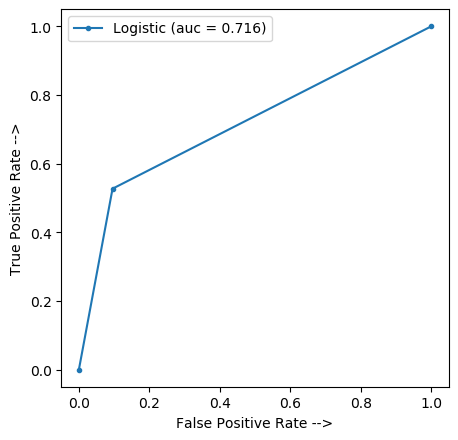

In [60]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test,pred)
auc_logistic = auc(logistic_fpr, logistic_tpr)



plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()